In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")
import warnings
warnings.filterwarnings('ignore')

In [9]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, SolverOptimizer
import numpy as np
import matplotlib.pyplot as plt

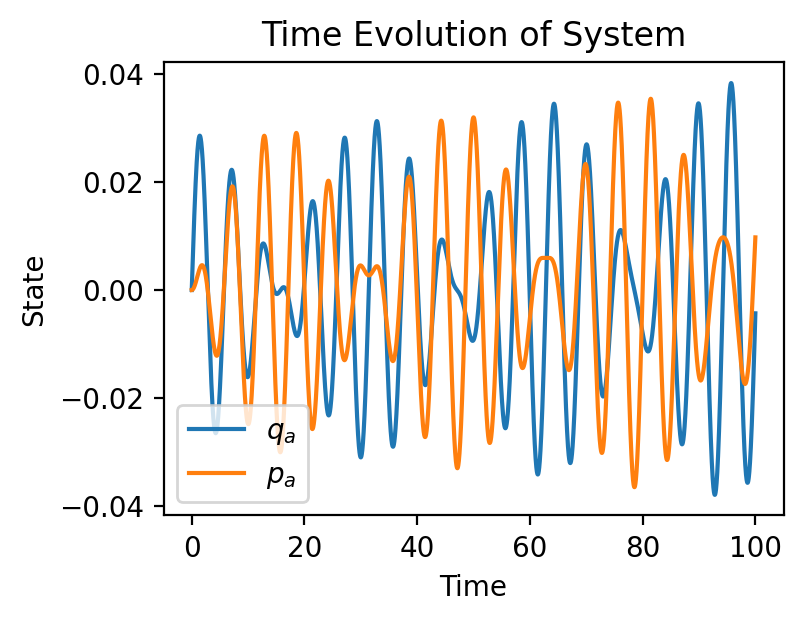

In [34]:
omega_a = 1
delta = 0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 100, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

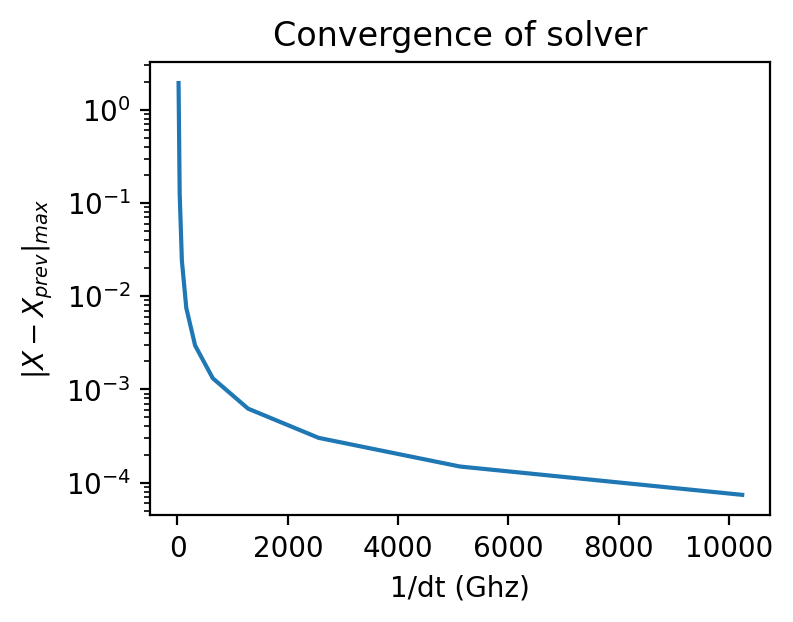

In [46]:
opt = SolverOptimizer(sys, x_0, 0, 100)
dchi_2s, dts = opt.optimal_dt()

fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts, dchi_2s)
ax.set_xlabel("1/dt (Ghz)")
ax.set_ylabel("$|X - X_{prev}|_{max}$")
ax.set_title(f"Convergence of solver")
plt.show()

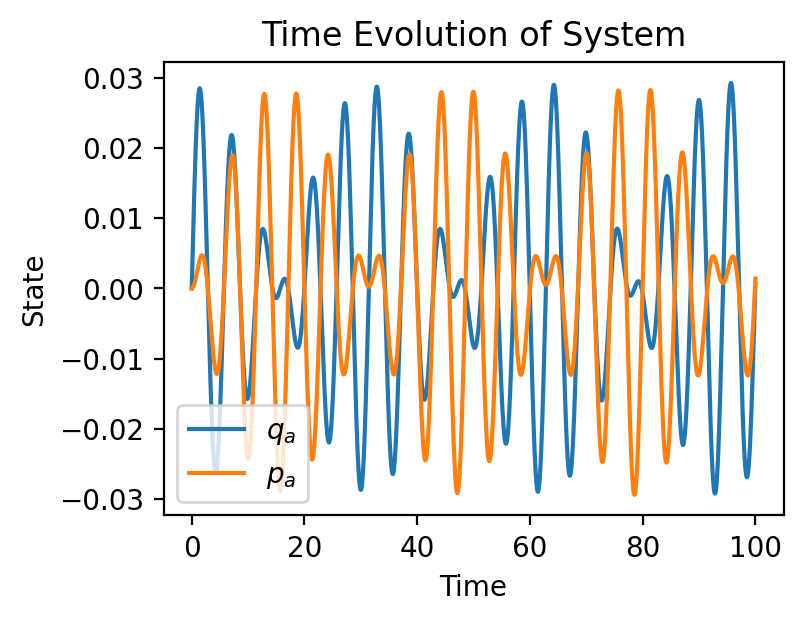

In [45]:
final_dt = dts[-1]
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
ts = np.arange(0, 100+final_dt, final_dt)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()